# Car Price Predictions 
#### Xavier Carter / July, 2021

Summary

The data We're working with here can be found on Kaggle
https://www.kaggle.com/ananaymital/us-used-cars-dataset

In [1]:
import numpy as np 
import pandas as pd 

from PythonScripts import evaluate, explore, scale, wrangle

import matplotlib.pyplot as plt

## Wrangle
- here we will aquire, prepare, encode, split and scale the data

#### Aquire

In [2]:
#this data set has 3,000,000 observations
# we will use 600,000 due to ram limitations
all_cars_df = wrangle.get_car_data(600000)
all_cars_df.shape

(600000, 66)

In [3]:
#A full walkthrough on how the data was clean and imputed is located in the Wrangle.ipynb

#### Prepare

In [4]:
cars_df = wrangle.clean_car_data(all_cars_df)
cars_df.shape

<class 'pandas.core.series.Series'>


(260368, 41)

In [5]:
cars_df.isna().sum().sum()

0

#### Encode

In [6]:
cars_df = wrangle.encode_cars(cars_df)

In [7]:
cars_df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,exterior_color_num,fleet_num,fuel_type_num,interior_color_num,listing_color_num,make_name_num,model_name_num,transmission_display_num,trim_name_num,wheel_system_num
2,2C4RC1BG5JR115361,39.0,Minivan,Dillsburg,18.0,39,17019,3600.0,V6,Velvet Red Pearlcoat,...,77.0,0.0,0.0,36.0,5.0,15.0,52.0,5.0,76.0,0.0
3,5XXGT4L36LG399390,35.6,Sedan,Brooklyn,24.0,22,11210,2400.0,I4,Ebony Black,...,74.0,0.0,0.0,0.0,0.0,8.0,30.0,1.0,10.0,0.0
4,1GCVKSEC8JZ200295,34.6,Pickup Truck,Manchester,16.0,19,3103,6200.0,V8,Silver Ice Metallic,...,9.0,0.0,0.0,7.0,2.0,1.0,1.0,4.0,535.0,2.0
9,1GNSKKKC3FR285438,39.7,SUV / Crossover,Lawrence,15.0,24,66046,5300.0,V8 Flex Fuel Vehicle,Silver Ice Metallic,...,9.0,0.0,1.0,3.0,2.0,1.0,66.0,4.0,299.0,2.0
12,4T1BF1FK1HU449757,38.9,Sedan,Pittsfield,24.0,38,1201,2500.0,I4,Celestial Silver Metallic,...,82.0,1.0,0.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0


#### Split/Scale

In [8]:
train, validate, test = wrangle.split_for_model(cars_df)

train(145805, 55),validate(62489, 55),test(52074, 55)


In [9]:
train_scaled, validate_scaled, test_scaled = scale.scale_data(train, validate, test, scale_type='Robust',to_scale=['width', 'wheelbase', 'mileage', 'horsepower', 'highway_fuel_economy','height',\
                                                                                                                   'fuel_tank_volume', 'engine_displacement', 'back_legroom', 'front_legroom', 'city_fuel_economy'])

## Explore

#### Univariate

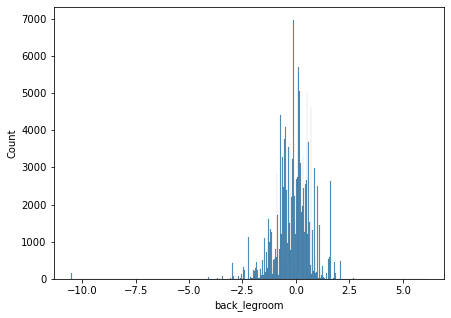

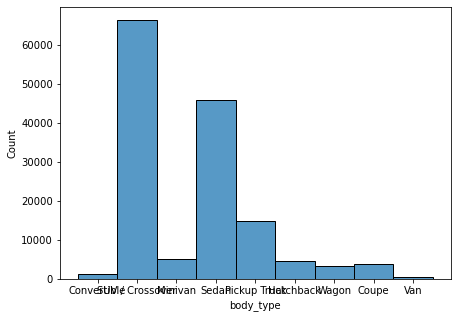

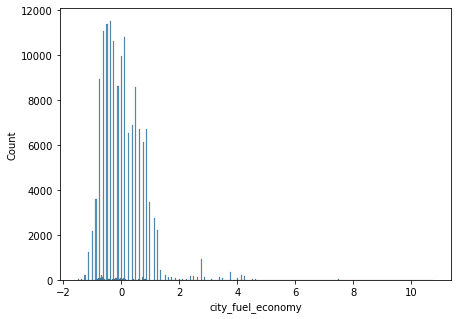

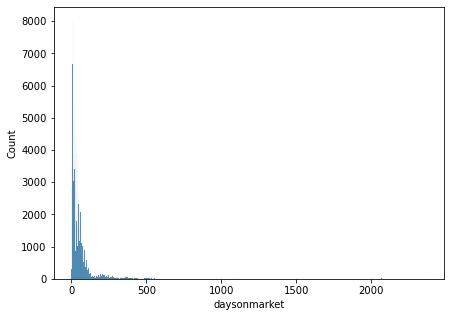

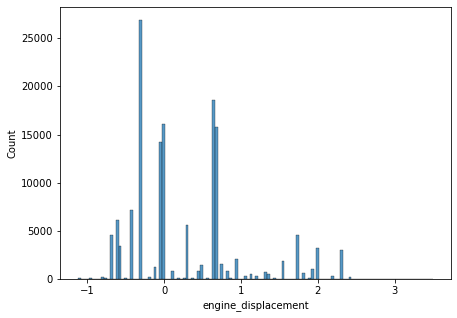

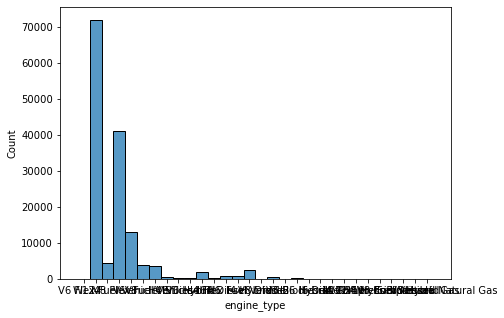

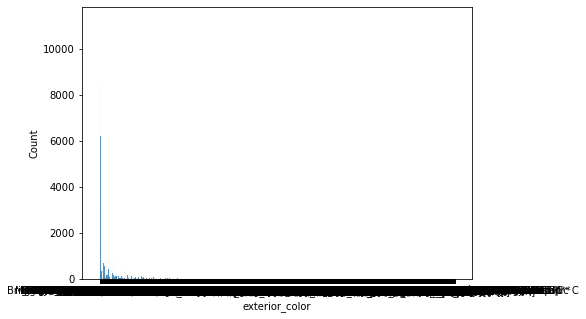

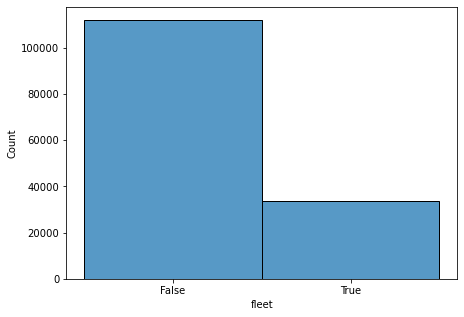

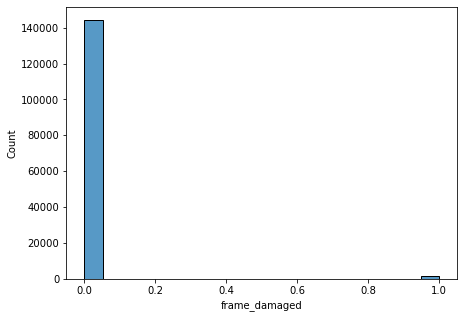

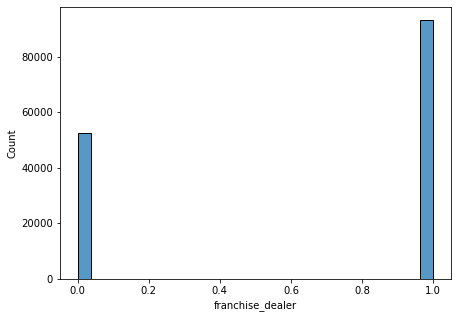

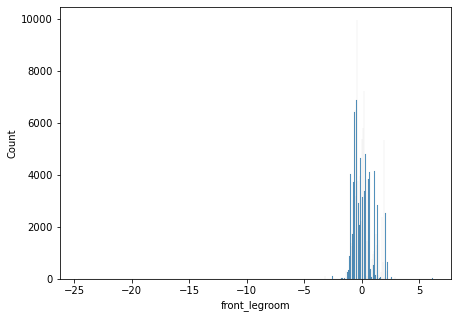

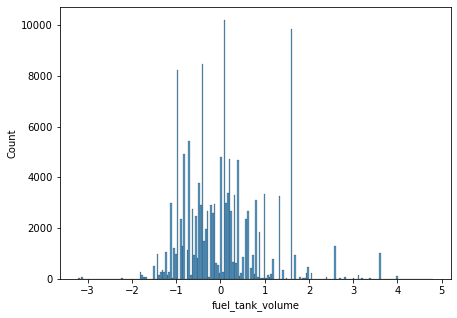

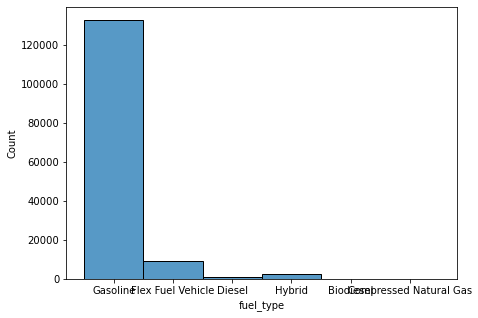

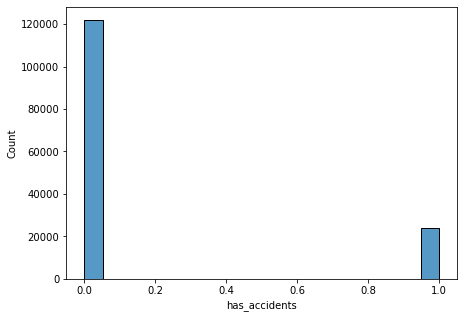

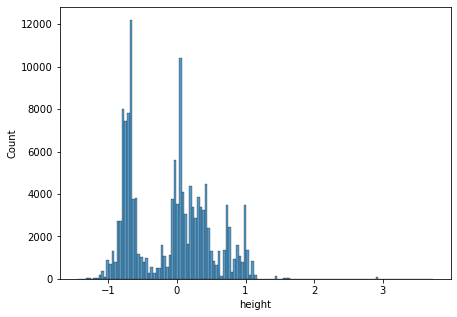

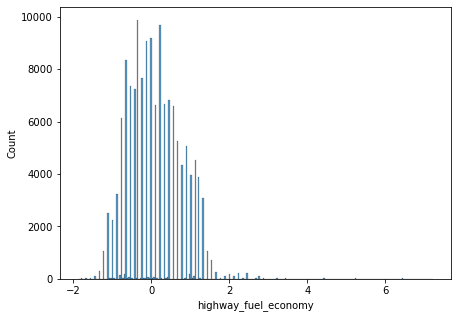

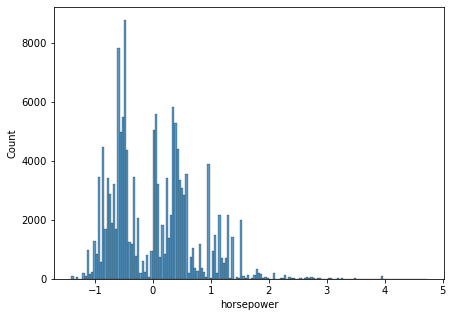

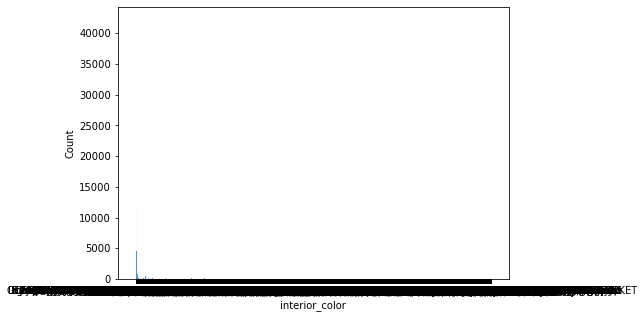

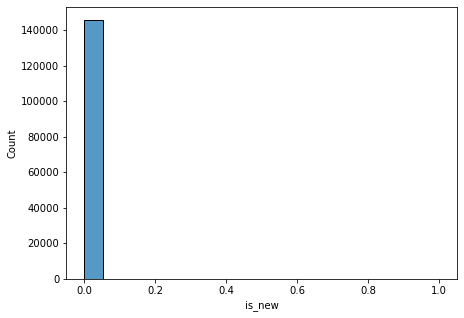

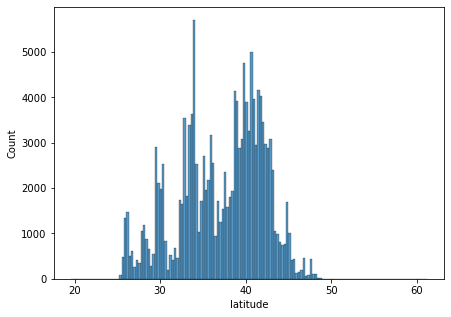

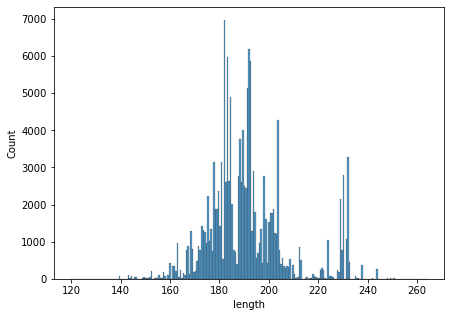

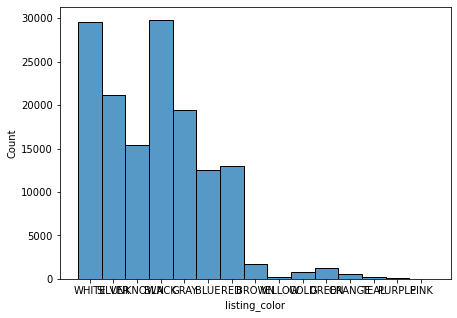

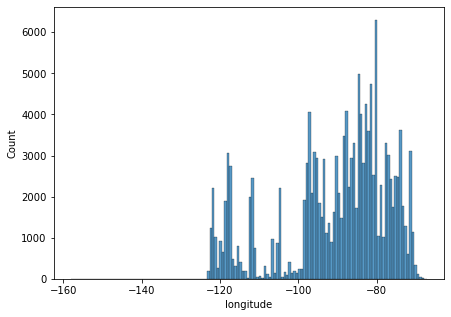

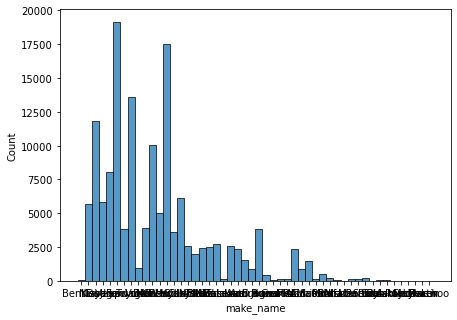

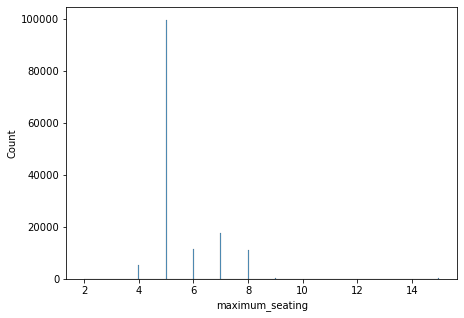

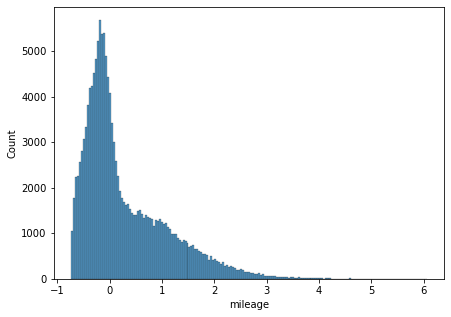

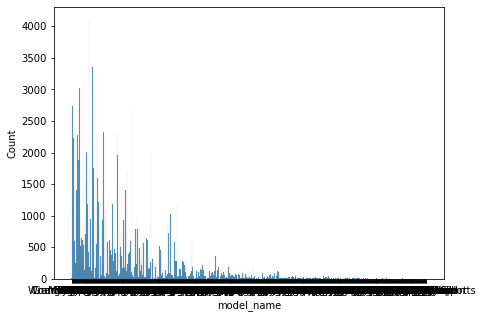

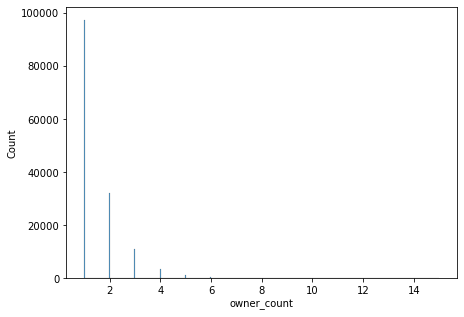

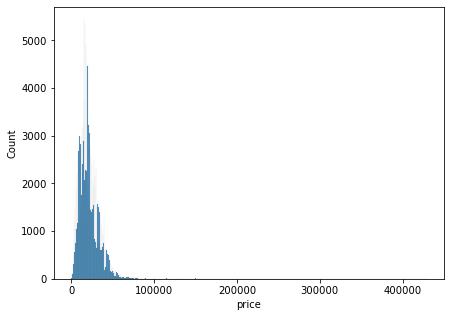

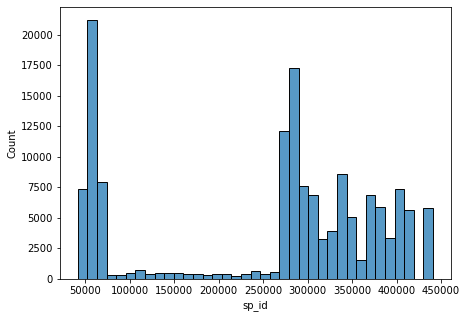

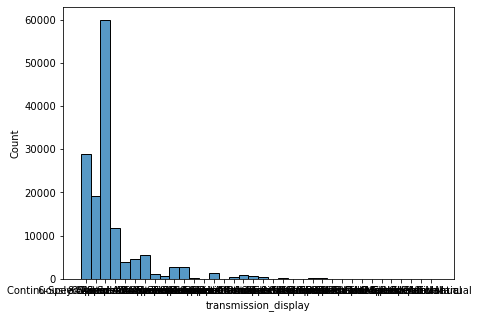

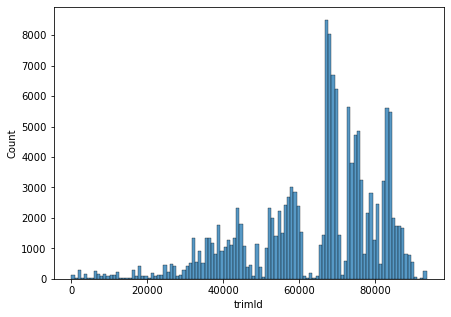

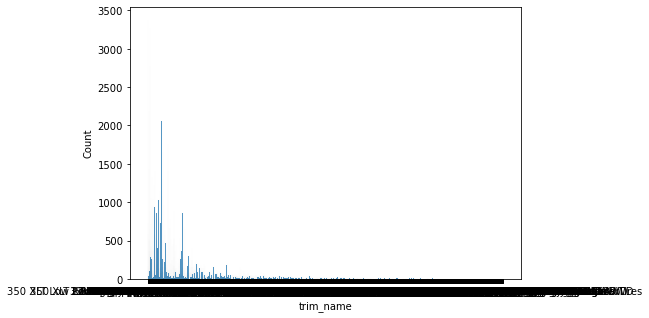

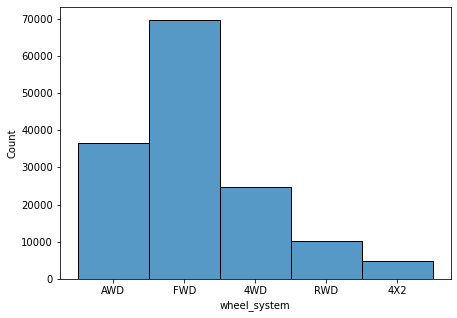

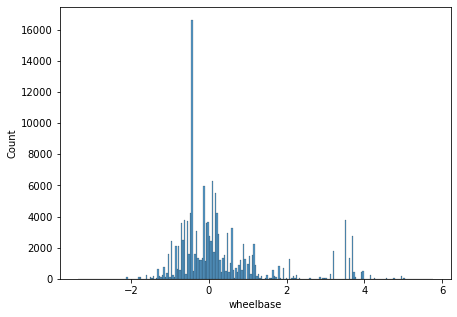

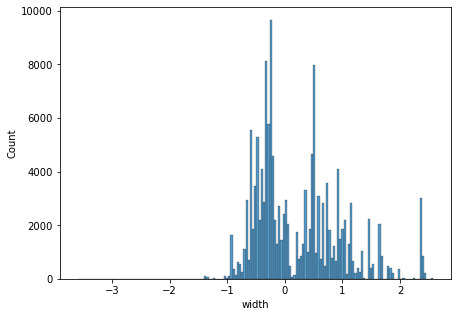

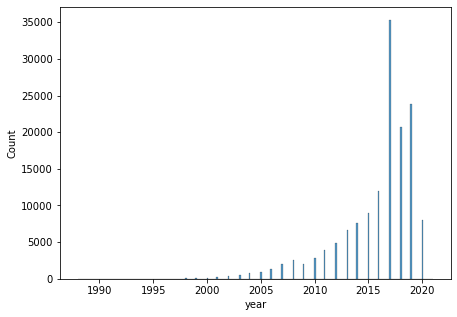

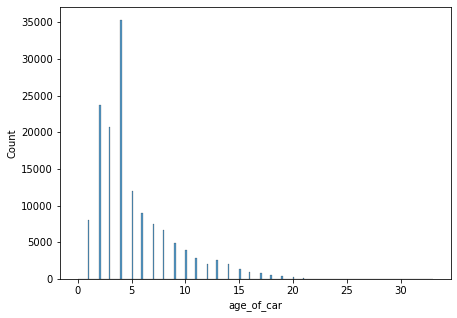

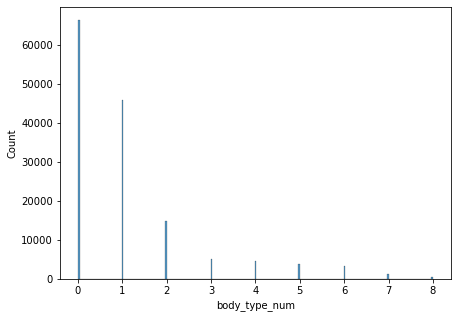

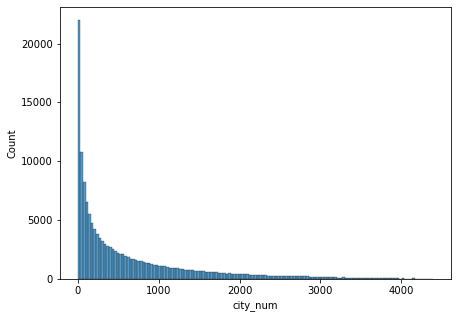

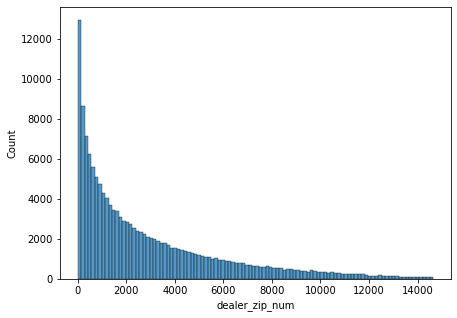

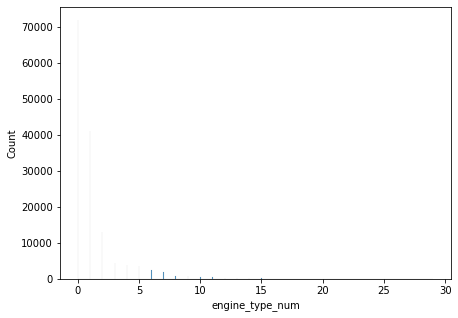

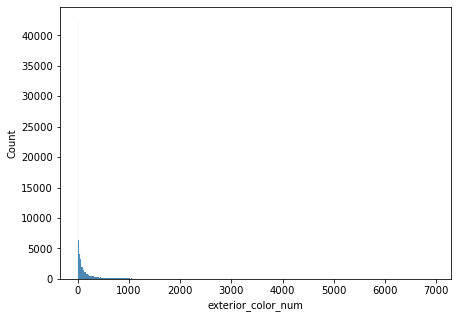

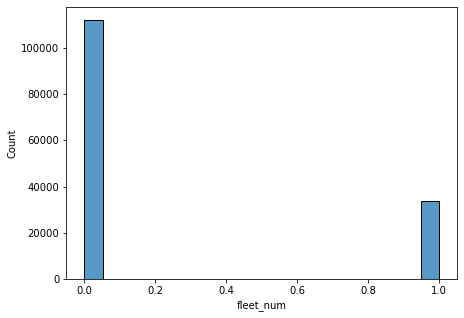

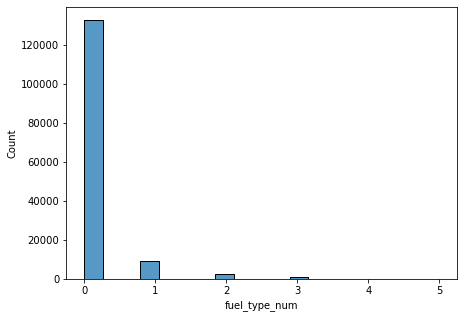

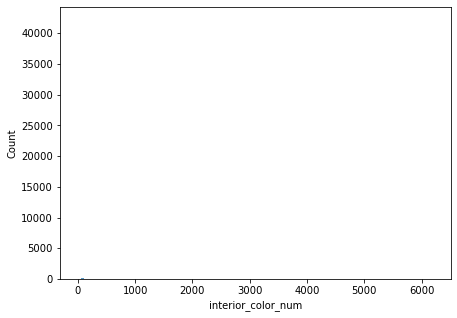

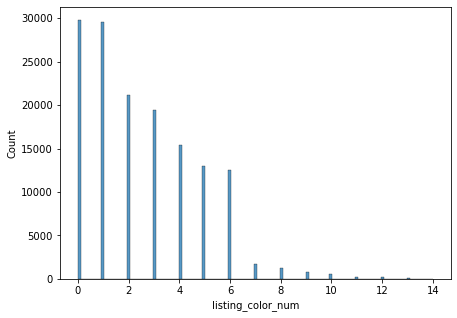

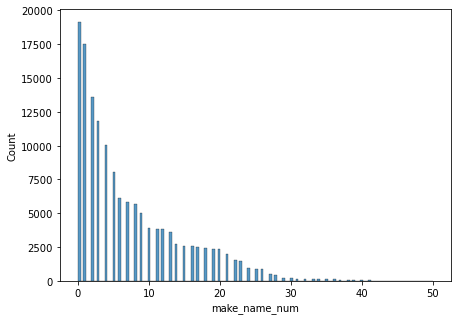

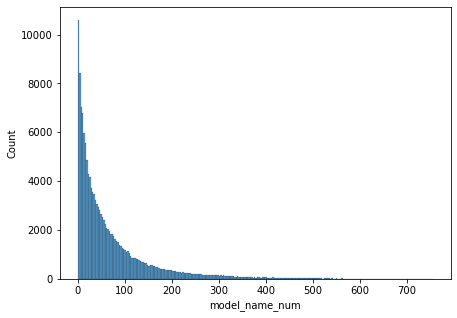

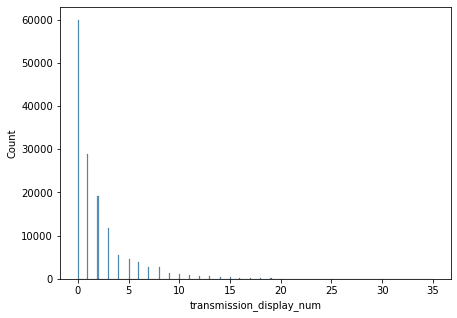

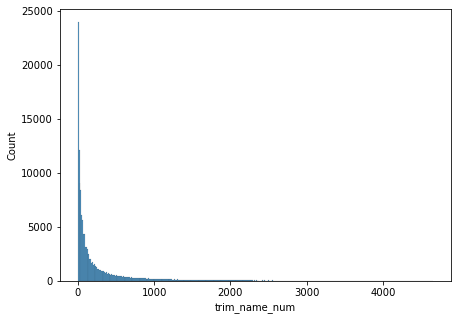

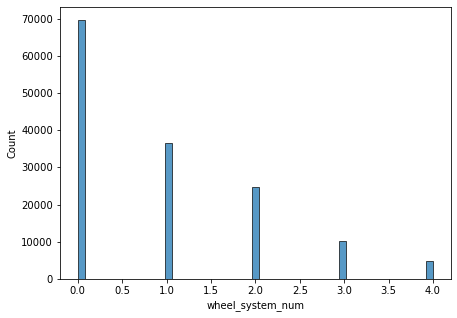

In [10]:
explore.get_distribution(train_scaled.drop(columns=['vin','city','dealer_zip']))

#### Bivariate
##### Target = Price

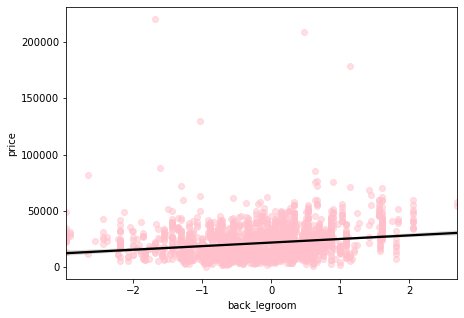

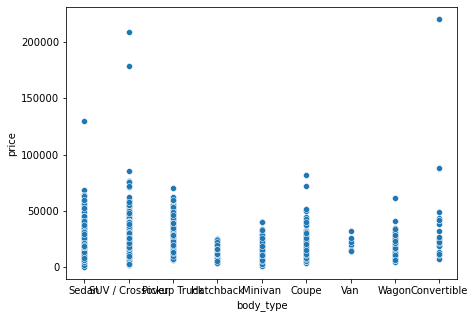

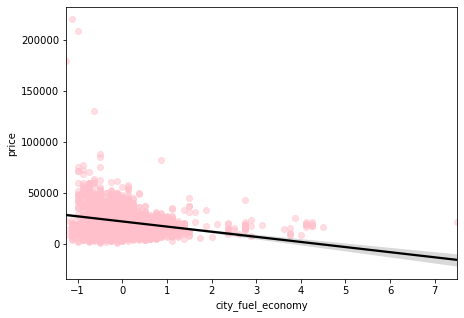

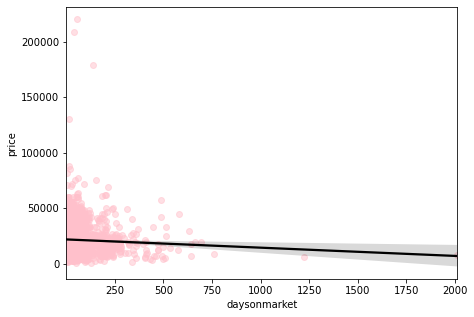

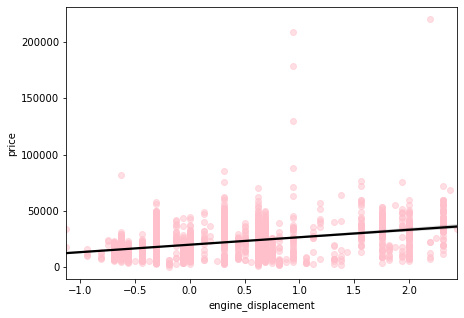

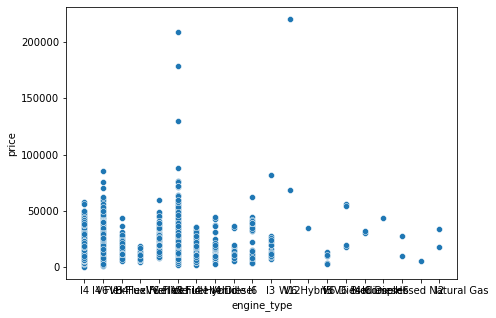

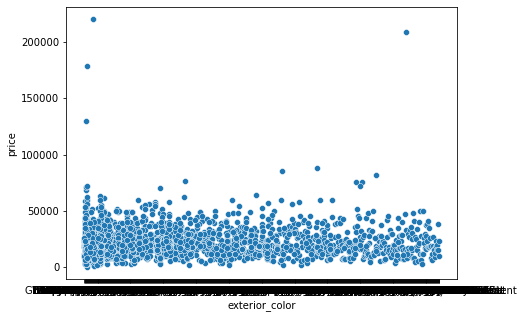

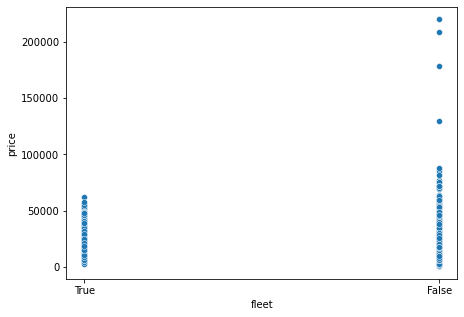

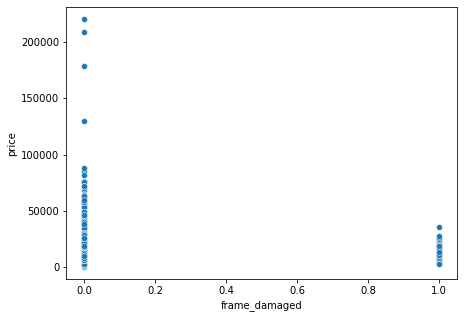

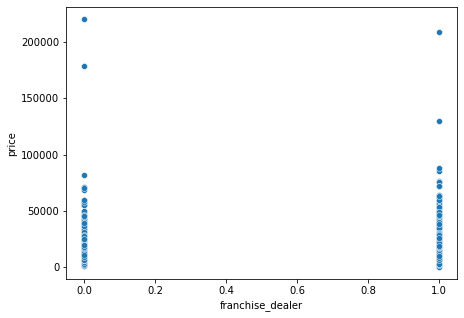

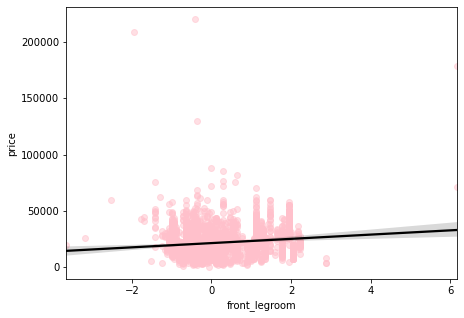

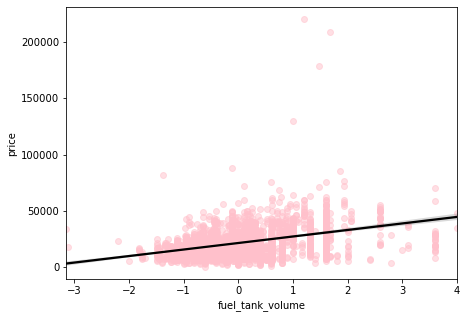

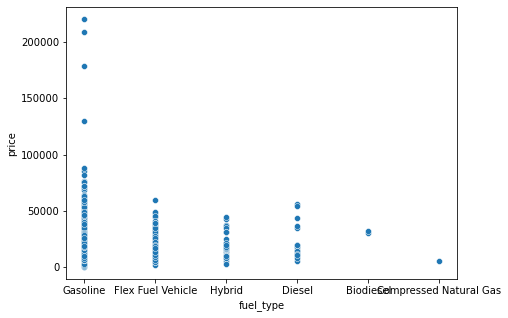

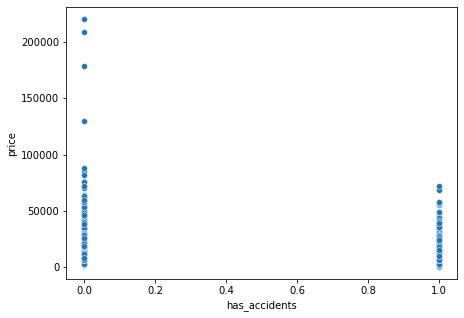

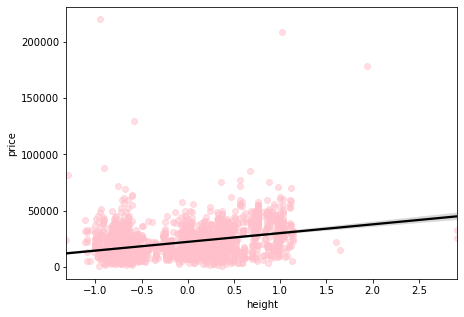

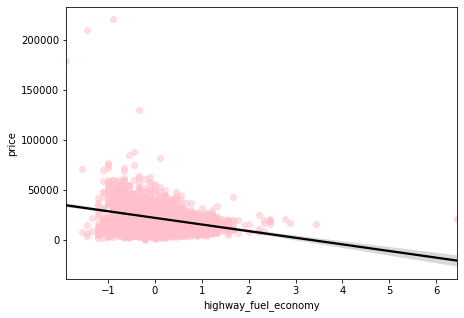

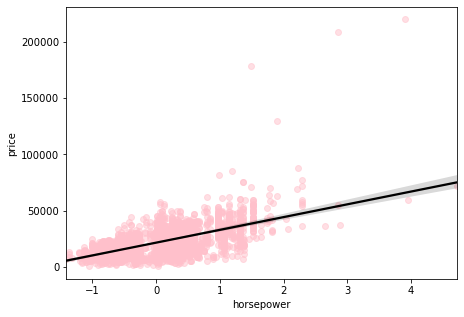

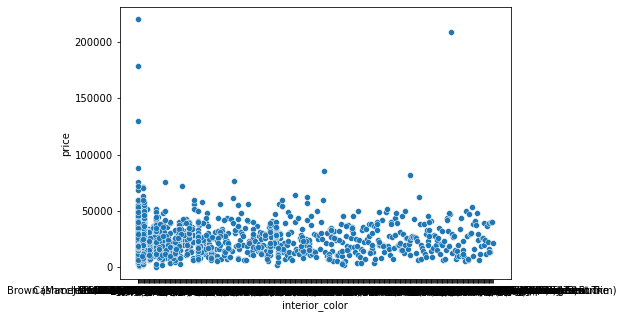

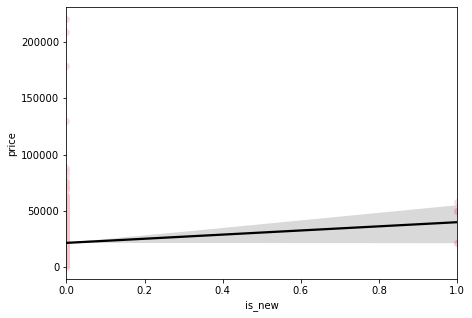

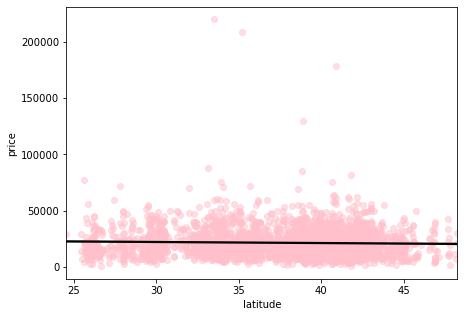

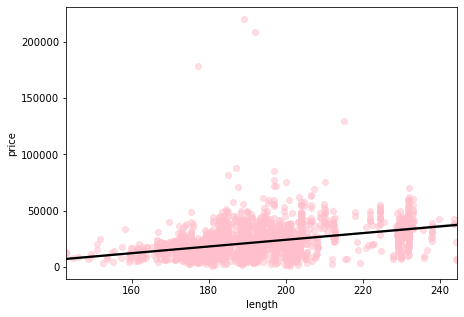

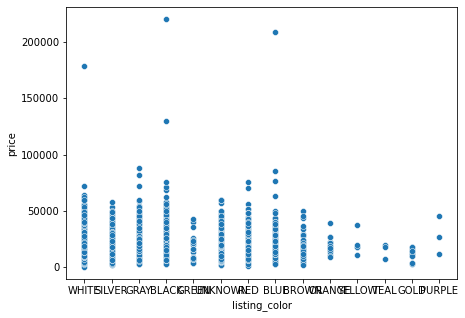

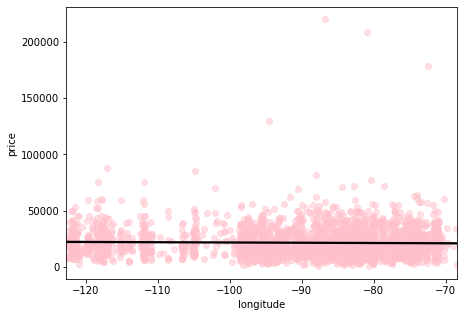

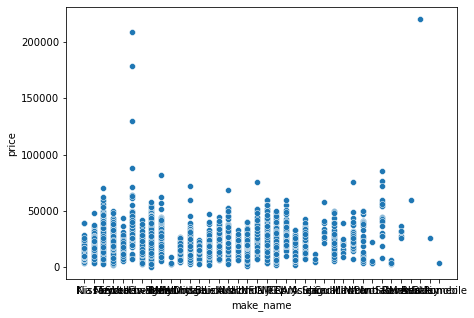

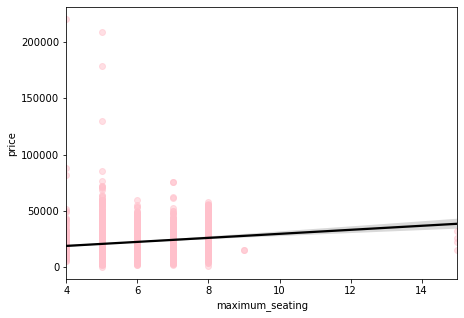

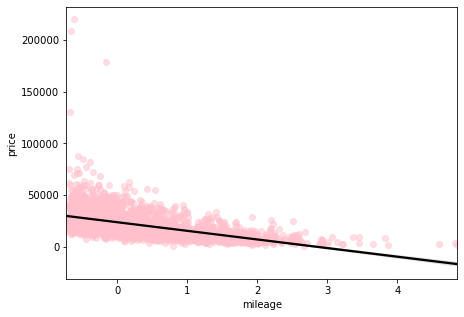

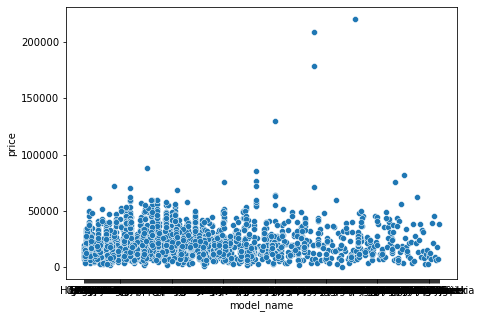

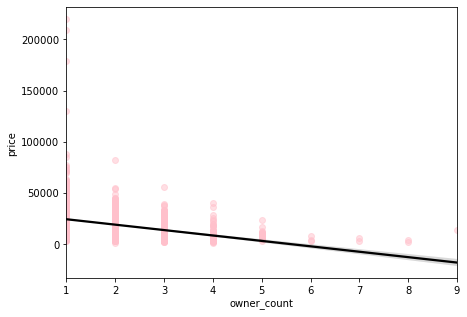

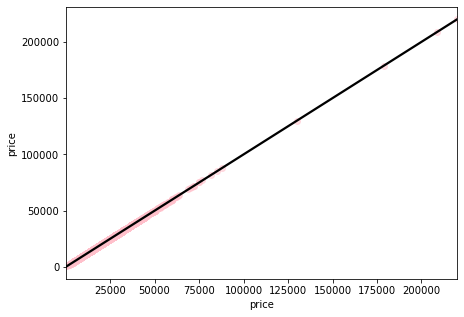

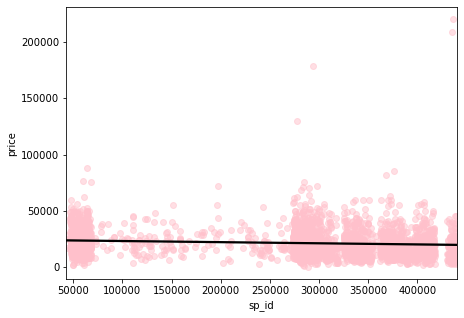

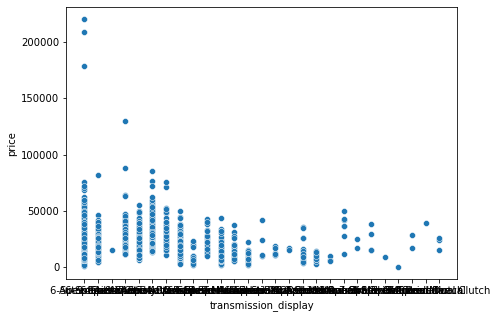

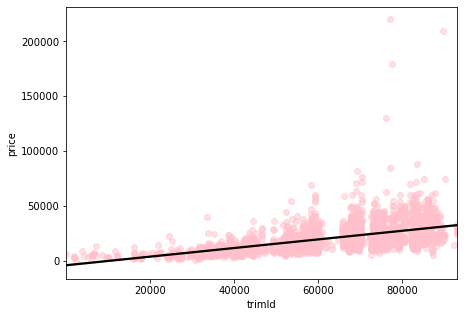

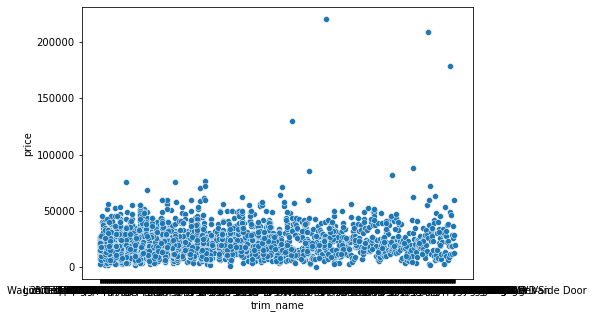

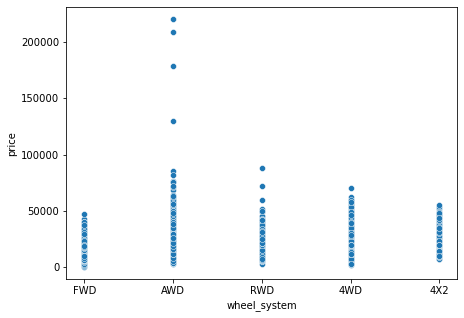

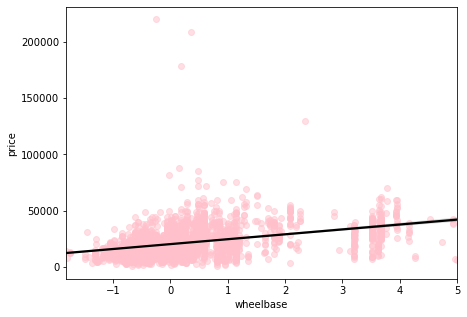

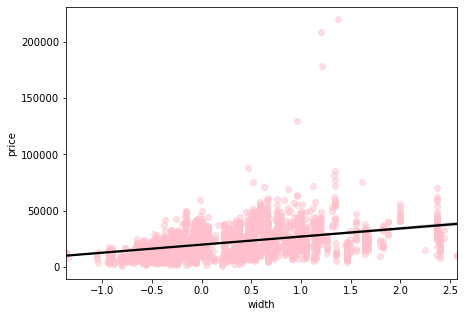

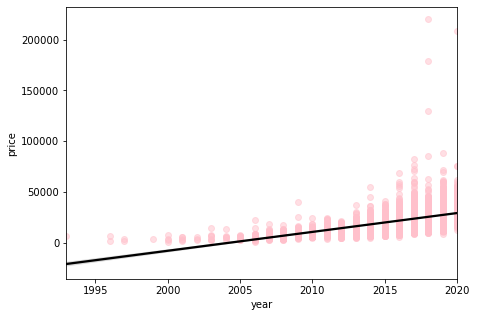

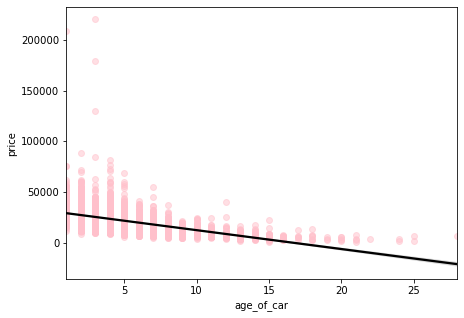

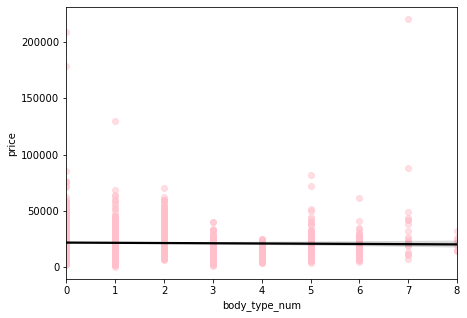

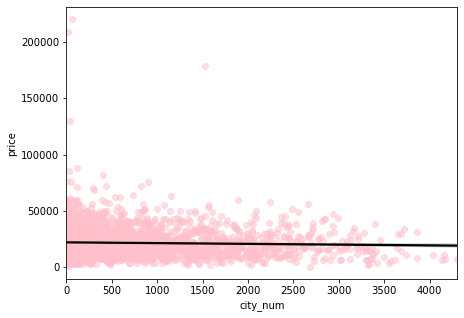

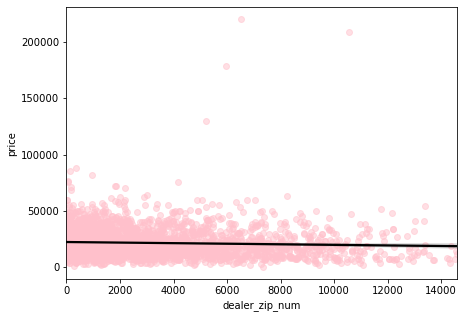

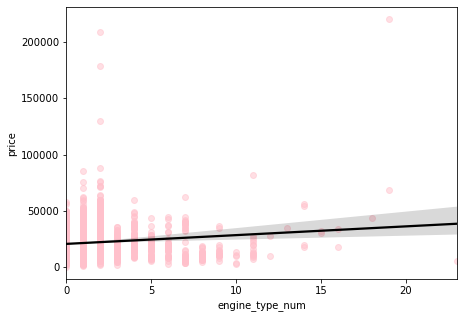

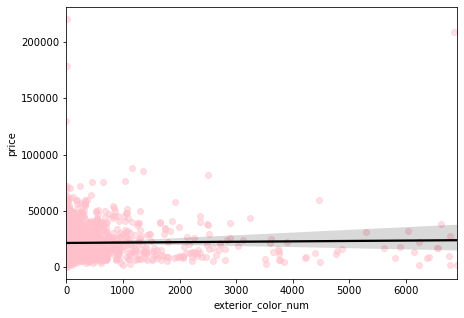

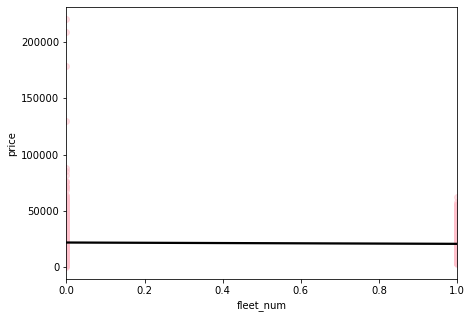

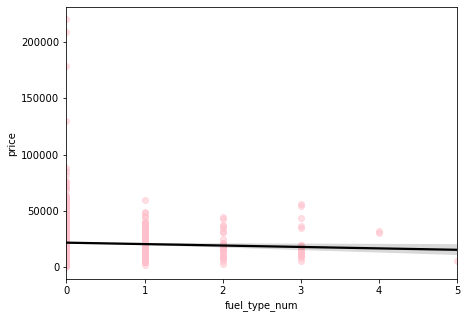

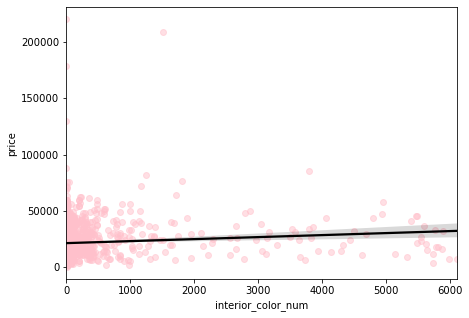

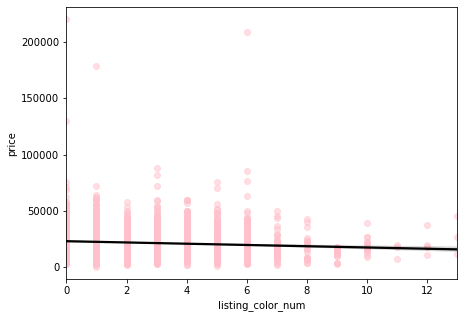

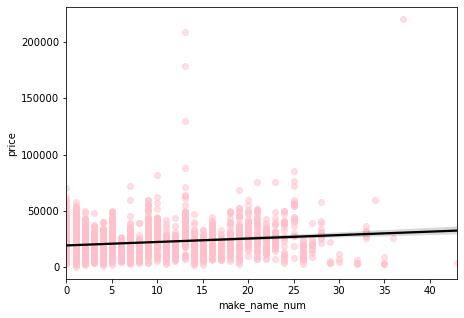

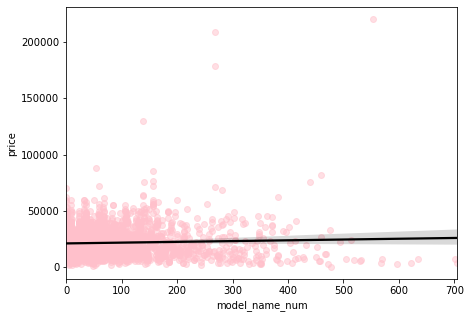

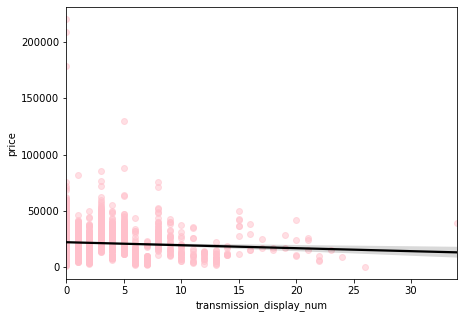

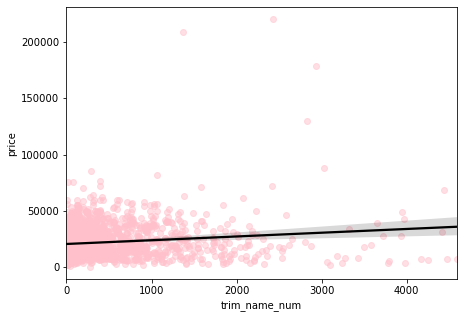

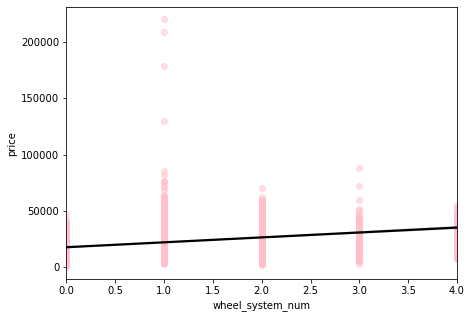

In [11]:
explore.graph_to_target(train_scaled.drop(columns=['vin','city','dealer_zip']).sample(3000), 'price')

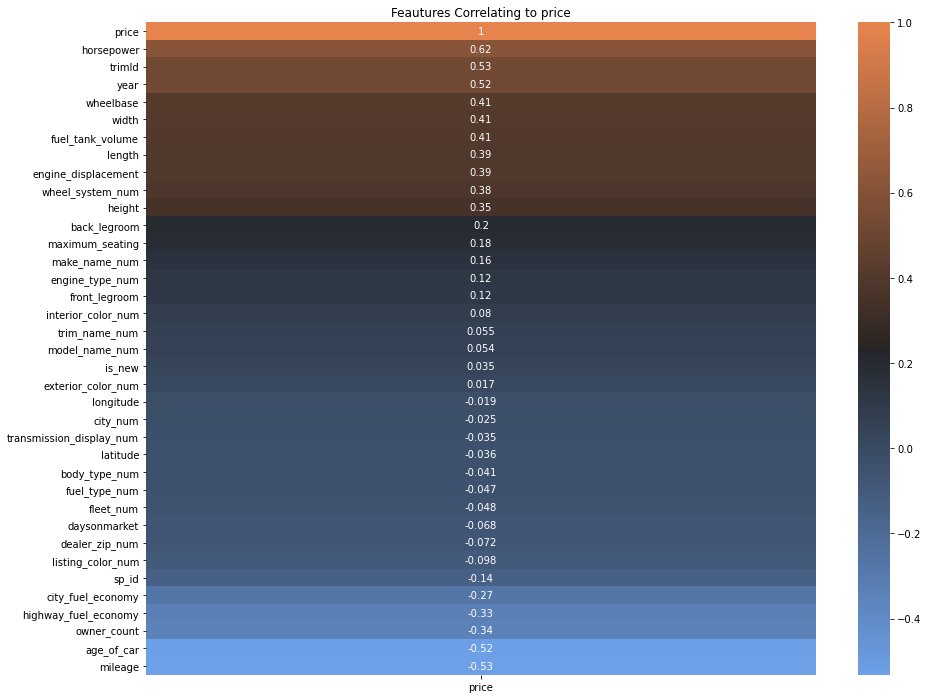

<AxesSubplot:title={'center':'Feautures Correlating to price'}>

In [12]:
explore.get_heatmap(train_scaled, 'price')

### Takeaways

## Statistical Tests
- We will check correlation to price based on user input.
- The user will enter the year, make , model , trim and mileage of the car
- through code we will grab the avg horsepower, fuel tank volume, engine displacment,fuel economy and wheelbase for the vehicle based on trim level

In [13]:
cat_vars = ['make_name_num', 'model_name_num', 'trimId']
cont_vars = ['year', 'horsepower', 'fuel_tank_volume', 'engine_displacement', 'city_fuel_economy', 'highway_fuel_economy', 'wheelbase']

In [14]:
#catagrorical vs continous , one tailed t test
evaluate.get_t_test(cat_vars,train_scaled, 'price', 0.01)

Null Hypothesis: make_name_num has no correlation to price
Alternative hypothesis:  make_name_num has correlation to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: model_name_num has no correlation to price
Alternative hypothesis:  model_name_num has correlation to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: trimId has no correlation to price
Alternative hypothesis:  trimId has correlation to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------


In [15]:
#continous vs continous, not normally distributed. pearsonsr
evaluate.get_pearsons(cont_vars,'price',0.01,train_scaled)

Null Hypothesis: there is not linear correlation between year and price 
Alternative hypothesis:  year has linear correlation  to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: there is not linear correlation between horsepower and price 
Alternative hypothesis:  horsepower has linear correlation  to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: there is not linear correlation between fuel_tank_volume and price 
Alternative hypothesis:  fuel_tank_volume has linear correlation  to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: there is not linear correlation between engine_displacement and price 
Alternative hypothesis:  engine_displacement has linear correlation  to price 
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis


### Feature Selection
- see if kbest or rfe add any additional insight to columns we should use

In [16]:
my_list = ['make_name_num', 'model_name_num', 'trimId', 'year','mileage', 'horsepower', 'fuel_tank_volume',\
           'engine_displacement' ,'wheelbase']

In [17]:
kbest = evaluate.select_kbest(train_scaled.select_dtypes(exclude='object'), train_scaled.price, 11)
kbest

['engine_displacement',
 'fuel_tank_volume',
 'horsepower',
 'length',
 'mileage',
 'price',
 'trimId',
 'wheelbase',
 'width',
 'year',
 'age_of_car']

In [18]:
rfe = evaluate.select_rfe(train_scaled.drop(columns='price').select_dtypes(exclude='object'), train_scaled.price, 11)
rfe

['city_fuel_economy',
 'engine_displacement',
 'fuel_tank_volume',
 'highway_fuel_economy',
 'horsepower',
 'is_new',
 'mileage',
 'year',
 'age_of_car',
 'fleet_num',
 'fuel_type_num']

rfe and kbest made suggestions but that may be useful(such as fleet status), these columns might not be readily availble for the user and not easily computable without further knowledge on a specific vehicle, we will use our own list

## Modeling 
- We will run an OLS Model, A lasso-lars model, Tweedie Regressor Model and Polynomial regression model to see which can not only beat the baseline but have the lowest rmse score

In [19]:
X_train = train_scaled[my_list]
y_train = train_scaled.price

X_validate = validate_scaled[my_list]
y_validate = validate_scaled.price

X_test = test_scaled[my_list]
y_test = test_scaled.price

### Baseline RMSE
- The RMSE to beat

In [20]:
baseline = round(evaluate.baseline_errors(y_train)[2], 4)
baseline

12289.0302

### OLS

In [21]:
ols_train = evaluate.get_model_results(X_train, y_train, X_train, y_train, 'price', 'linear', normalize=True)

r2 Score:  0.6963723838117757
RMSE Score: 6771.552463606863


In [22]:
ols_validate = evaluate.get_model_results(X_train, y_train, X_validate, y_validate, 'price', 'linear', normalize=True)

r2 Score:  0.7179028390701405
RMSE Score: 6520.816544199991


### Lasso Lars 

In [23]:
lasso_train = evaluate.get_model_results(X_train, y_train, X_train, y_train, 'price', 'lasso', alpha=0.05)

r2 Score:  0.6915280004832408
RMSE Score: 6772.227642041592


In [24]:
lasso_validate = evaluate.get_model_results(X_train, y_train, X_validate, y_validate, 'price', 'lasso', alpha=0.05)

r2 Score:  0.7129447885498927
RMSE Score: 6521.742635156477


### GLM 

In [25]:
glm_train = evaluate.get_model_results(X_train, y_train, X_train, y_train, 'price', 'glm', power=1)

r2 Score:  7.887286448791531e-31
RMSE Score: 12289.030231984567


In [26]:
glm_train = evaluate.get_model_results(X_train, y_train, X_validate, y_validate, 'price', 'glm', power=1)

r2 Score:  2.378303233879896e-06
RMSE Score: 12111.684039105134


### Polynomial 

In [27]:
poly_train = evaluate.get_model_results(X_train, y_train, X_train, y_train, 'price', 'poly', degree=3)

r2 Score:  0.8572094219697705
RMSE Score: 4643.734574289414


In [28]:
poly_validate = evaluate.get_model_results(X_train, y_train, X_validate, y_validate, 'price', 'poly', degree=3)

r2 Score:  0.8642011627798226
RMSE Score: 4738.543978093902


#### Best on test

In [29]:
poly_test = evaluate.get_model_results(X_train, y_train, X_test, y_test, 'price', 'poly', degree=3)

r2 Score:  0.7515568380545614
RMSE Score: 6136.199881713582


## Exploring error

In [30]:
train_scaled['predictions'] = poly_train[0]
train_scaled['diff'] = abs(train_scaled.price - train_scaled.predictions)

In [31]:
train_scaled[['vin','price','predictions','diff']]

,vin,price,predictions,diff
173168,SCBDR3ZAXAC065767,78500.0,76589.822758,1910.177242
94762,5XYPH4A16HG243923,23991.0,25729.410505,1738.410505
195409,KNMAT2MV3JP502846,18000.0,19918.899477,1918.899477
68814,1B4GP45332B671624,1995.0,8618.631382,6623.631382
83789,1C4RJFCG5EC197298,17228.0,12032.696554,5195.303446
...,...,...,...,...
98800,JTDKBRFU3G3004702,14900.0,10841.576521,4058.423479
581265,JTDKBRFU4H3543699,18750.0,15826.539499,2923.460501
132026,JN8AT2MV8HW007207,17868.0,19492.097122,1624.097122
198746,2GKALMEK2G6248124,15999.0,17180.393341,1181.393341


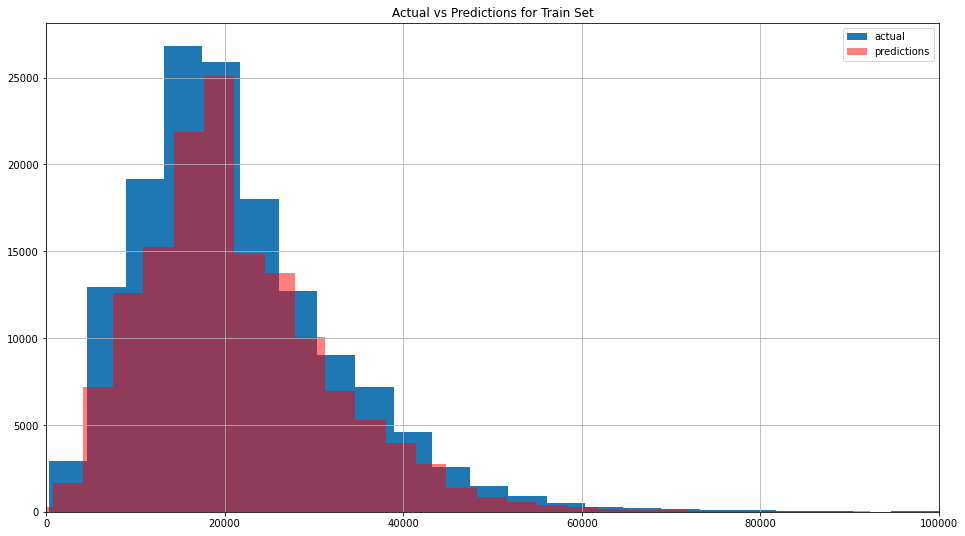

In [32]:
plt.figure(figsize=(16,9))
plt.title("Actual vs Predictions for Train Set")
train_scaled.price.hist(bins=100,label='actual')
train_scaled.predictions.hist(bins=100, color='r',alpha=0.5, label='predictions')
plt.xlim(0,100000)
plt.legend()
plt.show()

- It appears that the model is under estimating for majourity of the dataset

In [33]:
#looking at cheaper vehicles with high rates of error
train_scaled.loc[(train_scaled['diff'] > 30000) & (train_scaled['price'] <= 30000) ][['vin','price','predictions','diff']]

,vin,price,predictions,diff
275800,1GTHC24U75E125400,13990.0,68267.610664,54277.610664
582492,1GNDM19X35B101306,6990.0,40441.589113,33451.589113
130966,2FTRX17W54CA06569,6998.0,-46743.209362,53741.209362


## Conclusions
- The model itself does not do well at predicting older cars, as well as luxury cars, which makes sense. the data was pulled from car gurus so doens thave exposure to a lot of this data. 
- Splitting the dataset into diffrent markets may allow for better accuracy,
- Going back ill take a look a possible anomalies that are skewing my data and remove them.

## Export Model

In [34]:
import pickle
data = {'model': poly_train[2], 'X_train': X_train, 'y_train':y_train, 'df':cars_df }
with open('car_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [35]:
X_train

,make_name_num,model_name_num,trimId,year,mileage,horsepower,fuel_tank_volume,engine_displacement,wheelbase
173168,37.0,369.0,40670,2010,-0.441124,2.644068,1.16,2.1875,-0.244681
94762,8.0,36.0,67858,2017,-0.240626,0.000000,0.16,-0.3125,-0.106383
195409,3.0,5.0,76570,2018,-0.296727,-0.593220,-0.70,0.0000,-0.414894
68814,7.0,483.0,4302,2002,3.513501,-0.508475,0.40,0.5000,0.308511
83789,5.0,10.0,49178,2014,1.623465,0.008475,1.32,0.3125,0.468085
...,...,...,...,...,...,...,...,...,...
98800,2.0,81.0,60817,2016,0.694857,-1.008475,-1.34,-0.4375,-0.436170
581265,2.0,81.0,69045,2017,-0.303621,-1.008475,-1.34,-0.4375,-0.436170
132026,3.0,5.0,68523,2017,-0.325108,-0.593220,-0.70,0.0000,-0.414894
198746,9.0,26.0,58505,2016,0.114762,-0.491525,0.16,-0.0625,0.223404
